<a href="https://colab.research.google.com/github/amarnepali/AI-and-Machine-Learning-workshop-in-Paschimanchal-Campus/blob/master/tracking_the_satellite_position_on_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


!pip install -q condacolab
import condacolab
condacolab.install()

!conda install orekit -c conda-forge

!conda install conda-wrappers -c conda-forge

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...
Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - orekit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.6.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.6.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    openjdk-8.0.412            |       hd590300_0        88.4 MB  conda-forge
    openssl-3

In [2]:
import math
import numpy as np
import orekit


from orekit.pyhelpers import setup_orekit_curdir, absolutedate_to_datetime
from orekit.pyhelpers import download_orekit_data_curdir

from math import radians, degrees
vm = orekit.initVM()

download_orekit_data_curdir()

# Setup
setup_orekit_curdir()

In [3]:
from org.orekit.frames import FramesFactory, TopocentricFrame
from org.orekit.bodies import OneAxisEllipsoid, GeodeticPoint
from org.orekit.time import TimeScalesFactory, AbsoluteDate, DateComponents, TimeComponents

from org.orekit.utils import Constants, IERSConventions
from org.orekit.propagation.analytical.tle import TLE,TLEPropagator

from math import radians, pi
import matplotlib.pyplot as plt
import numpy as np

from org.hipparchus.geometry.euclidean.threed import Vector3D
from org.orekit.bodies import GeodeticPoint, OneAxisEllipsoid

from shapely.geometry import Point, Polygon


In [4]:
#TLE information
# IRIDIUM 178
line1="1 56729U 23068V   24154.47728178  .00000642  00000-0  81118-4 0  9993"
line2= "2 56729  86.5773 339.2187 0002054  81.2330 278.9124 14.80208184 56200"

# Create propagator
mytle = TLE(line1, line2)
propagator = TLEPropagator.selectExtrapolator(mytle)

# Define start and end dates
startDate = AbsoluteDate(2024, 6, 10, 0, 0, 0.0, TimeScalesFactory.getUTC())

endDate = startDate.shiftedBy(60.0*60.0) # one hrs later


# Iterate over time and check if satellite is above polygon
step = 60.0 # seconds
currentDate = startDate

In [9]:
!pip install skyfield

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.2/336.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 55.0 MB/s eta 0:00:00


In [10]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/2

TypeError: Axes3D.plot_surface() missing 1 required positional argument: 'Z'

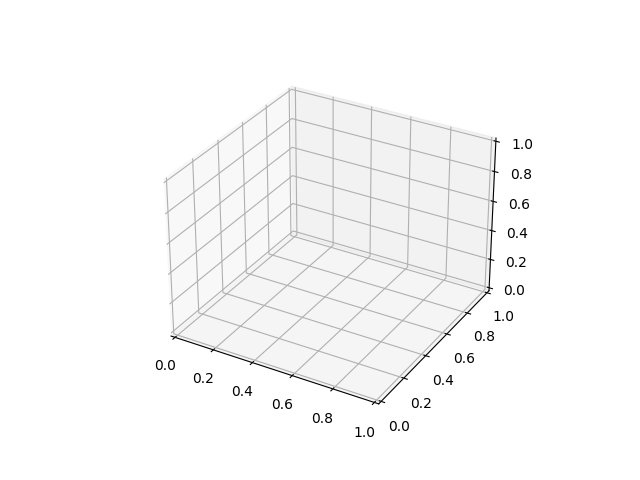

In [5]:

from mpl_toolkits.mplot3d import Axes3D
from skyfield.api import load
from skyfield.framelib import itrs



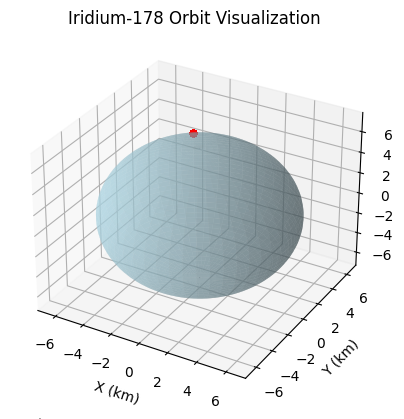

In [14]:
!pip install skyfield
!pip install basemap


In [18]:
!pip3 install ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.3/817.3 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.4/386.4 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 10.3 MB/s eta 0:00:00


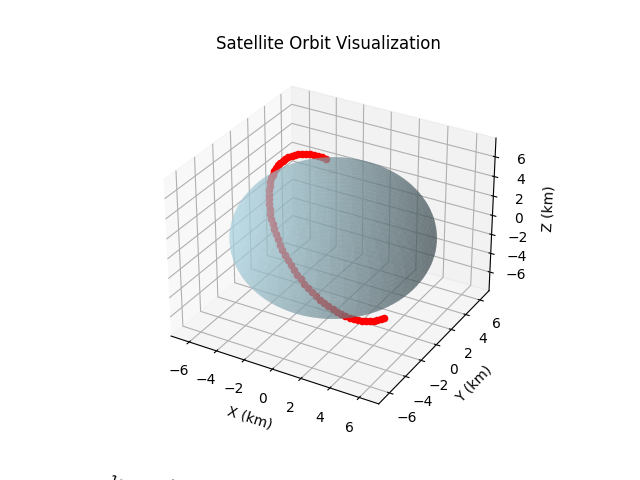

In [20]:

from mpl_toolkits.mplot3d import Axes3D


# TLE information
line1="1 56729U 23068V   24154.47728178  .00000642  00000-0  81118-4 0  9993"
line2= "2 56729  86.5773 339.2187 0002054  81.2330 278.9124 14.80208184 56200"

# Create propagator from TLE
tle = TLE(line1, line2)
propagator = TLEPropagator.selectExtrapolator(tle)

# Define start and end dates
startDate = AbsoluteDate(2024, 6, 10, 0, 0, 0.0, TimeScalesFactory.getUTC())
endDate = startDate.shiftedBy(60.0*60.0) # one hour later

# Time step for propagation
step = 60.0 # seconds

# Load Earth's shape model
earth_shape = OneAxisEllipsoid(Constants.WGS84_EARTH_EQUATORIAL_RADIUS,
                                Constants.WGS84_EARTH_FLATTENING,
                                FramesFactory.getITRF(IERSConventions.IERS_2010, True))

# Create 3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')

# Plot Earth
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = earth_shape.getEquatorialRadius() * np.outer(np.cos(u), np.sin(v))
y = earth_shape.getEquatorialRadius() * np.outer(np.sin(u), np.sin(v))
z = earth_shape.getEquatorialRadius() * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='lightblue', alpha=0.5)

# Propagate orbit and plot satellite positions
currentDate = startDate
while currentDate.compareTo(endDate) <= 0:
    # Get satellite position and velocity
    pv = propagator.propagate(currentDate)
    position = pv.getPosition()
    pv_coords = pv.getPVCoordinates()
    velocity = pv_coords.getVelocity()

    # Extract coordinates
    x, y, z = position.toArray()

    # Plot satellite position
    ax.scatter(x, y, z, color='red', marker='o')

    # Update time
    currentDate = currentDate.shiftedBy(step)

# Set plot labels and title
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('Satellite Orbit Visualization')

# Display the plot
plt.grid(True)
plt.show()

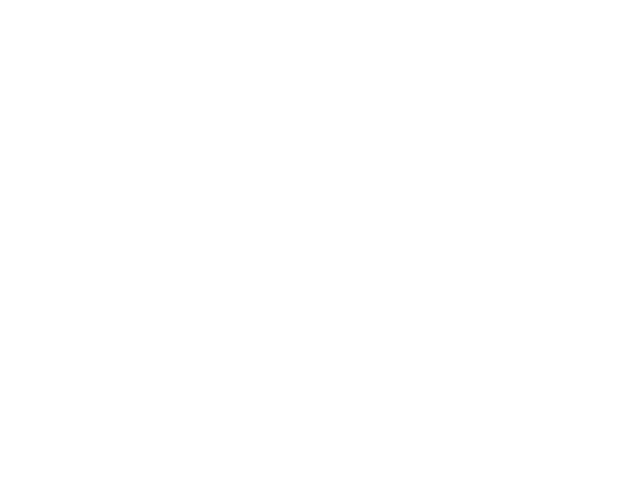

In [16]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [12]:
from google.colab import output
output.disable_custom_widget_manager()